<a href="https://colab.research.google.com/github/Aakash-Gore/ALU_Design/blob/main/EE769_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First block of code is where I import all the libraries required for this assignment

In [113]:
import numpy as np #I'm importing the numpy library and using is by a variable named np
import pandas as pd #I'm importing the pandad library and using is by a variable named pd
import matplotlib.pyplot as plt  #I'm importing the matplotlib library and using is by a variable named plt


1) Function to generate an input data matrix X of size NXD

In [114]:

def x_generator(N, S):  #Function definition. Parameters used are N, the dimension, and S, the generator matrix
  M = S.shape[0] #storing the no. of rows in S as M
  temp = np.random.randn(N,M) #creating a temporary matrix of size NxM filled with entries of of the standard normal
  X = temp.dot(S) # multiplying the temp matrix and the generator matrix S
  return X# returning X as the value of the function


In [115]:
def target_generator(X,w, sigma):
  D = X.shape[0]
  W1 = w[:-1]
  B1 = w[-1]
  t = X.dot(W1) + B1
  return t


[0.0003743171691894531, 0.00013589859008789062, 0.0001430511474609375, 0.00015211105346679688, 0.00012874603271484375, 0.00013208389282226562, 0.00016021728515625, 0.00013947486877441406, 0.0001373291015625, 0.00016546249389648438, 0.00014543533325195312, 0.00016736984252929688, 0.0001621246337890625, 0.00015044212341308594, 0.0001537799835205078, 0.0001480579376220703, 0.0001423358917236328, 0.0023360252380371094, 0.00019741058349609375, 0.00017571449279785156, 0.00015544891357421875, 0.00029754638671875, 0.00016045570373535156, 0.0001666545867919922, 0.00015616416931152344, 0.0002129077911376953, 0.0001621246337890625, 0.00015735626220703125, 0.00016951560974121094, 0.00015783309936523438, 0.0001785755157470703, 0.00016498565673828125, 0.00017595291137695312, 0.00016880035400390625, 0.0001995563507080078, 0.0001697540283203125, 0.00017833709716796875, 0.00018072128295898438, 0.00019931793212890625, 0.00018906593322753906, 0.00020051002502441406, 0.000217437744140625, 0.00020885467529

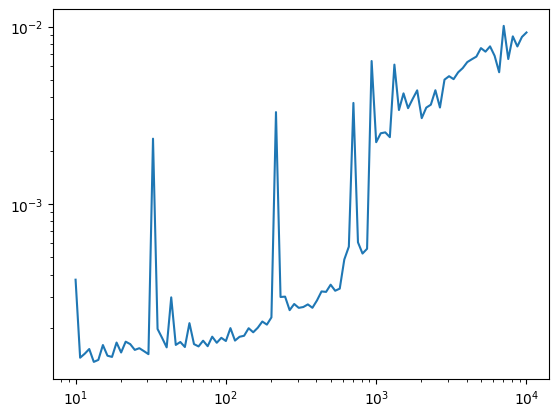

In [116]:
import time

tim = []
n = []
N_loop = np.logspace(1,4,num = 100)
for i in N_loop:
  x = np.random.randn(int(i),10)
  t = np.random.randn(int(i),1)
  start = time.time()
  W = np.matmul(np.linalg.pinv(x),t)
  end = time.time()
  tim.append(end-start)
  n.append(i)

plt.plot(n,tim)
plt.xscale('log')
plt.yscale('log')
print(tim)

[10.0, 10.722672220103231, 11.497569953977356, 12.32846739442066, 13.219411484660288, 14.174741629268055, 15.199110829529339, 16.297508346206442, 17.47528400007684, 18.73817422860384, 20.09233002565047, 21.544346900318846, 23.101297000831604, 24.770763559917114, 26.560877829466868, 28.48035868435802, 30.538555088334157, 32.74549162877728, 35.11191734215131, 37.64935806792467, 40.37017258596554, 43.28761281083057, 46.4158883361278, 49.770235643321115, 53.3669923120631, 57.22367659350217, 61.35907273413173, 65.79332246575683, 70.54802310718645, 75.64633275546291, 81.11308307896873, 86.97490026177834, 93.26033468832199, 100.0, 107.22672220103232, 114.97569953977356, 123.28467394420659, 132.19411484660287, 141.74741629268047, 151.99110829529332, 162.97508346206433, 174.7528400007683, 187.3817422860383, 200.92330025650458, 215.44346900318845, 231.01297000831605, 247.70763559917114, 265.6087782946687, 284.8035868435802, 305.3855508833416, 327.45491628777285, 351.1191734215131, 376.4935806792

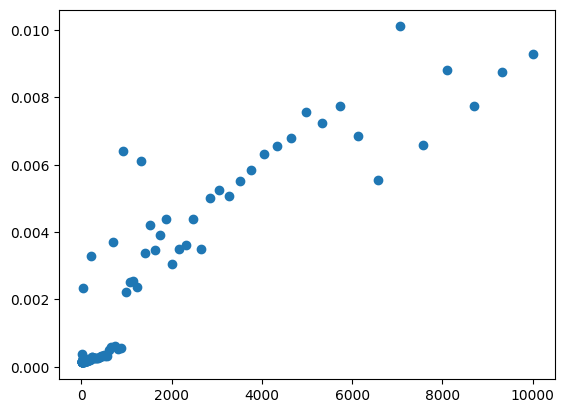

In [117]:
plt.scatter(n,tim)
#plt.xscale('log')
#plt.yscale('log')
print(n)
print(tim)


In [118]:
y = np.random.randn(2)
t = np.random.randn(2)
print(y)
print(y-t)
def NRMSE(y, t):
  y_max = np.max(y)
  y_min = np.min(y)
  n = y.shape[0]
  #rmse calc
  d = np.square(y-t)
  d = (np.sqrt(np.sum(d)/n))/(y_max-y_min)
  return d
NRMSE(y,t)

[ 0.64702285 -0.11645626]
[ 0.76021641 -1.3672626 ]


1.4488874365220819

In [119]:
def calc_grad_mse(W,X,t):
  D = X.shape[1]
  N = X.shape[0]
 # y = (X).dot(W)
  X_prime = np.zeros(shape = (N,D+1))
  X_prime[:N,1:D+1] = X
  X_prime[:N,0] = np.ones(N)
  y = np.matmul(X_prime,W)
  mse = np.sum(np.square(y-t))/(2*N)
  grad = np.zeros_like(W)
  #print(grad.shape)
  #grad[0] = d.sum()/N
  for k in range(0,D+1):
    d = y-t
    xk = X_prime[:N,k]
    xk = xk.reshape((N,1))
    #print(xk.shape)
    #print(d.shape)
    grad[k] = np.matmul(d.T, xk)
    #print(tmp.shape)
  return grad



array([[-20.90301261],
       [-34.50482744],
       [177.98226501],
       [  3.68425459],
       [-12.61057771],
       [ 66.70043307]])

In [120]:
def calc_grad_L2(W):
  norm = np.sqrt(np.matmul(W.T,W))
  grad = W/norm
  return grad


array([[ 0.06289077],
       [-0.09354114],
       [ 0.92073681],
       [ 0.22626319],
       [ 0.23513673],
       [ 0.18180819]])

In [121]:

def calc_grad_L1(W):
  grad = W/np.absolute(W)
  return grad




<ipython-input-121-17fcd165c17b>:3: RuntimeWarning: invalid value encountered in divide
  grad = W/np.absolute(W)


array([ 1., nan, -1.])

In [170]:
def gradient_descent_lin_reg(W,X,t,lambda1,lambda2, alpha):
  D = X.shape[1]
  N = X.shape[0]
  X_prime = np.zeros(shape = (N,D+1))
  X_prime[:N,1:D+1] = X
  X_prime[:N,0] = np.ones(N)



  W_prime = W
  i = 0
  K = 1000
  loss = np.zeros(K)
  while i<K:
    y = np.matmul(X_prime,W_prime)
    mse = np.sum(np.square(y-t))/(2*N)
    norm_L2 = np.sqrt(np.matmul(W_prime.T,W_prime))
    norm_L1 = np.sum(np.absolute(W_prime))

    loss[i] = mse + lambda1*norm_L1/2 + lambda2*norm_L2/2
   # if loss[i]>loss[i-1]):
    #  K=i
      #break
    #print(loss[i])
    grad_mse = calc_grad_mse(W_prime,X,t)
    grad_L2 = calc_grad_L2(W_prime)
    grad_L1 = calc_grad_L1(W_prime)


    grad = grad_mse + lambda1*grad_L1/2 + lambda2*grad_L2/2
    W_prime = W_prime - alpha*grad
    #if np.sqrt(np.matmul(alpha*(grad.T),alpha*grad)) < eps:
      #break
    i = i+1
  #plt.plot(range(K), loss)
  return W_prime


In [180]:
nrmse = []
for a in range(1,1000):
  avg = 0
  print(a)
  for b in range(5):
    sigma = a
    S = np.identity(5)
    X = x_generator(500,S)
    W = np.random.randn(6,1)
    t = target_generator(X,W,sigma)
    train_x = X[:350, :]
    train_t = t[:350]
    test_x = X[350:,:]
    test_t = t[350:]
    W = gradient_descent_lin_reg(W,train_x,train_t,0.4,0.4,5e-5)
    D = test_x.shape[1]
    N = test_x.shape[0]
    test_x_prime = np.zeros(shape = (N,D+1))
    test_x_prime[:N,1:D+1] = test_x
    test_x_prime[:N,0] = np.ones(N)
    y_test = np.matmul(test_x_prime, W)
    avg = avg+NRMSE(y_test, test_t)

  nrmse.append(avg/5)







1


<ipython-input-170-919dedaaf509>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  loss[i] = mse + lambda1*norm_L1/2 + lambda2*norm_L2/2


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

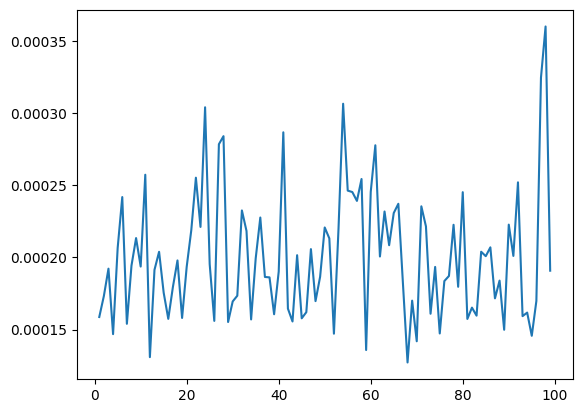

In [179]:
plt.plot(range(1,100),nrmse)

0.00016410402309386906